In [1]:
import numpy as np                               #for creating ndarrays for fast and efficient computations

import matplotlib as mpl                         #for graphing purposes
import matplotlib.pyplot as plt                  #for making plots
from mpl_toolkits.mplot3d import Axes3D          #for making 3d Axes (canvas)
from matplotlib import cm

#for interactive notebooks
%matplotlib notebook

In [66]:
from ipywidgets import widgets, fixed            #imports widgets for interactivity with plots etc
from ipywidgets import interact, interactive,  FloatSlider 
from IPython.display import display

/home/johnnguyen1792/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/home/johnnguyen1792/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


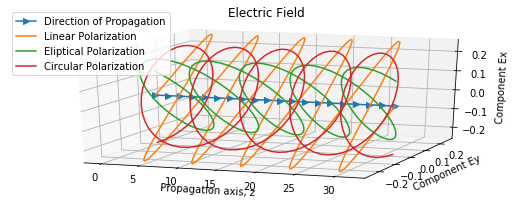

In [3]:
steps_size= 200
z = 10*np.pi

Z = np.linspace (0, z, steps_size)

Z_prop =np.linspace (0, z, steps_size/10)
K_prop = np.linspace(0,0, steps_size/10)

electric = plt.figure(figsize=(7.5,3))
electric_ax_1 = electric.add_subplot(111, projection="3d")
electric_ax_1.set_title('Electric Field') #title
electric_ax_1.set_xlabel('Propagation axis, z') # label the x axis
electric_ax_1.set_ylabel('Component Ey') # label the y axis
electric_ax_1.set_zlabel('Component Ex') # label the z axis

electric_plot1 = electric_ax_1.plot(Z_prop, K_prop, K_prop, marker= '>',label = 'Direction of Propagation')
electric_plot1 = electric_ax_1.plot(Z, 0.25*np.sin(Z), 0.25*np.sin(Z),label = 'Linear Polarization')
electric_plot2 = electric_ax_1.plot(Z, 0.25*np.sin(Z), -0.25*np.sin(Z-np.pi/6), label = 'Eliptical Polarization')
electric_plot3 = electric_ax_1.plot(Z, 0.25*np.sin(Z), 0.25*np.sin(Z-np.pi/2), label = 'Circular Polarization')
electric_ax_1.legend()
electric_ax_1.view_init(20,-70)
plt.tight_layout()
electric.savefig('Polarization_of_Electromagnetic_Radiation.png', format = 'png', bbox_inches ='tight')

In [4]:
electric.savefig('Polarization_of_Electromagnetic_Radiation.png', format = 'png')

In [2]:
xy_domains = 1.0*10**-7
x = np.linspace(-xy_domains,xy_domains, 10000)
y = np.linspace(-xy_domains,xy_domains, 10000)
z = np.linspace(-xy_domains*100,xy_domains*100, 10000)

def beam_focus(lam = 3500.*10**-9 ,z0 = 0.25):
    w_0 = np.sqrt(lam*z0/np.pi)
    return w_0

def beam_waist(z, lam = 3500.*10**-9 ,z0 = 0.25):
    w_0 = beam_focus(lam,z0)
    w = w_0 *np.sqrt(1+(z/z0)**2)
    return w

def electric_field_GB(z, z0, lam = 3500.*10**-9, E_0 = 1, phase_shift = 0):
    jones_vec = (np.cos(z*2*np.pi/lam), np.cos(z*2*np.pi/lam+phase_shift))
    w_0 = beam_focus(lam, z0)
    w = beam_waist(z)
    E_0_y = jones_vec[0]*w_0/w * np.exp(-(0**2/w**2))
    E_0_x = jones_vec[1]*w_0/w * np.exp(-(0**2/w**2))
    E_vec = np.array((E_0_x,E_0_y))
    return E_vec

def wavefront_curvature_GB(z,z0=0.1):
    return z*(1 + (z0/z)**2)
    
def intensity_GB(x, y, z, z0, lam = 3500.*10**-9):
    r = np.sqrt(x**2 + y**2)
    w = beam_waist(z, lam, z0)
    I = 2/(np.pi*w**2) * np.exp(-2*(r/w)**2)
    return I

def k_vector(lam = 3500.*10**-9):
    return 2*np.pi/lam

def longitudinal_phase_GB(z,z0, lam = 3500.*10**-9): 
    k = k_vector()
    phase = k*z-np.arctan(z/z0)
    return phase

def radial_phase_GB(x,y,z,z0, lam = 3500.*10**-9):
    rho = np.sqrt(x**2 + y**2)
    k = k_vector()
    phase = k*rho**2/(2*wavefront_curvature_GB(z,z0))
    return phase

def phase_GB(x,y,z,z0, lam=3500*10**-9):
    radians = longitudinal_phase_GB(z,z0,lam)+radial_phase_GB(x,y,z,z0,lam)
    vector_complex = np.array((np.cos(radians), np.sin(radians)))
    return vector_complex

In [107]:
lam = 3500.*10**-9
steps = 1000
xy_domain = 0.0
z0 = 2.0

z = np.linspace(-5*lam, 5*lam, steps)
x = np.linspace(-xy_domain,xy_domain, steps)
y = np.linspace(-xy_domain,xy_domain, steps)


phase_GB(x,y,z,z0)

array([[ 1.00000000e+00,  9.98022228e-01,  9.92097834e-01, ...,
         9.92097834e-01,  9.98022228e-01,  1.00000000e+00],
       [ 8.75000000e-06,  6.28620053e-02,  1.25466676e-01, ...,
        -1.25466676e-01, -6.28620053e-02, -8.75000000e-06]])

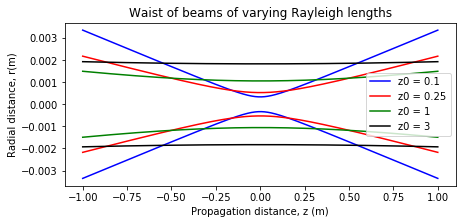

In [7]:
rho = np.linspace(-1,1,1000)
z = np.linspace(-1,1,1000)

gaussian_beams = plt.figure(figsize = (7,3))
gaussian_beams_ax = gaussian_beams.add_subplot(111)

beam0top = gaussian_beams_ax.plot(z,  beam_waist(z, z0 = 0.1), c = 'b', label = 'z0 = 0.1')
beam0bot = gaussian_beams_ax.plot(z, -beam_waist(z, z0 = 0.1), c = 'b')

beam1top = gaussian_beams_ax.plot(z,  beam_waist(z, z0 = 0.25), c = 'r', label = 'z0 = 0.25')
beam1bot = gaussian_beams_ax.plot(z, -beam_waist(z, z0 = 0.25), c = 'r')

beam2top = gaussian_beams_ax.plot(z,  beam_waist(z, z0 = 1), c = 'g', label = 'z0 = 1')
beam2bot = gaussian_beams_ax.plot(z, -beam_waist(z, z0 = 1), c = 'g' )

beam3top = gaussian_beams_ax.plot(z,  beam_waist(z, z0 = 3), c = 'k', label = 'z0 = 3')
beam3bot = gaussian_beams_ax.plot(z, -beam_waist(z, z0 = 3), c = 'k' )

gaussian_beams_ax.legend()
gaussian_beams_ax.set_title("Waist of beams of varying Rayleigh lengths")
gaussian_beams_ax.set_xlabel("Propagation distance, z (m)")
gaussian_beams_ax.set_ylabel("Radial distance, r(m)") 
gaussian_beams.savefig('Gaussian_beams_waists.png', format = 'png', bbox_inches ='tight')

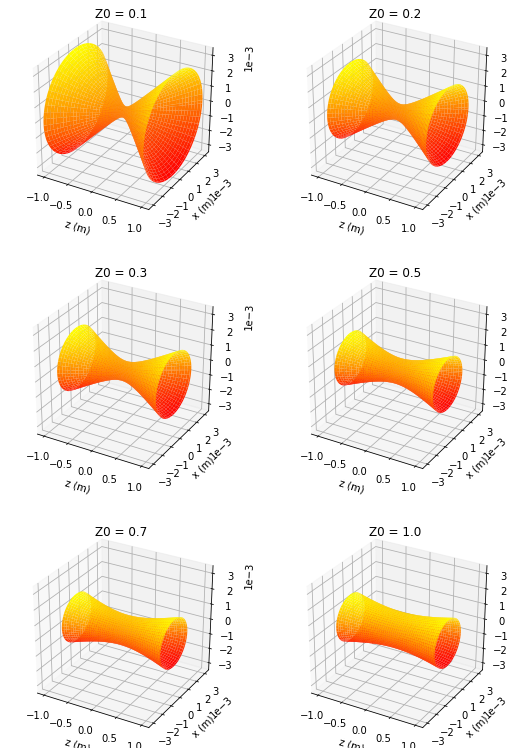

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (9, 9*1.5), subplot_kw={'projection': '3d'})

steps = 100
domain_z = 1
z = np.linspace(-domain_z, domain_z, steps)
phi = np.linspace(0, 2*np.pi, steps)
Z, PHI = np.meshgrid(z, phi)

def meshgrid_cartesian_polar(W, PHI):
    X, Y = W*np.cos(PHI), W*np.sin(PHI)
    return X, Y

some_lists=[[0.1, 0.2],
           [0.3, 0.5], 
           [0.7, 1.0]] 

rho_limit = beam_waist(domain_z, z0 = 0.1)

j = 0
for lists in some_lists:
    i=0
    for z0 in lists:
        W = beam_waist(Z, z0 = z0)
        X, Y = meshgrid_cartesian_polar(W, PHI)
        axs[j,i].plot_surface(Z, X, Y, cmap='autumn', cstride = 2, rstride = 2)
        axs[j,i].set_title("Z0 = " + str(z0))
        axs[j,i].set_xlabel("z (m)")
        axs[j,i].set_ylabel("x (m)")
        axs[j,i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        axs[j,i].ticklabel_format(style='sci', axis='z', scilimits=(0,0))
        axs[j,i].set_ylim(-rho_limit,rho_limit)
        axs[j,i].set_zlim(-rho_limit,rho_limit)
        i+=1
    j+=1

fig.savefig('Gaussian_beams_3d_plots.png', format = 'png', bbox_inches ='tight')

In [9]:
beam_waist(domain_z, z0 = z0)

0.0014927053303604616

/home/johnnguyen1792/.local/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


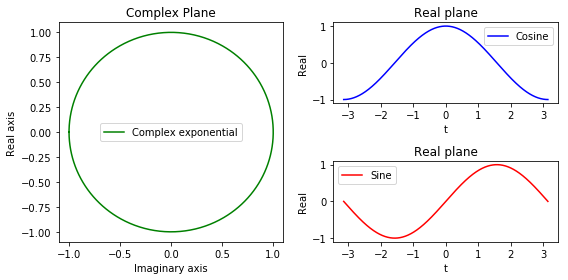

In [10]:
import matplotlib.gridspec as gridspec
t = np.linspace(-np.pi,np.pi,1000)
sin = np.sin(t)
cos = np.cos(t)

fig = plt.figure(figsize = (8, 4), tight_layout = True)
gs = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[:, 0])

cosine_real = ax1.plot(t, cos, c = 'b', label = 'Cosine')

ax1.legend()
ax1.set_title("Real plane")
ax1.set_ylabel("Real")
ax1.set_xlabel("t")

beam0top = ax2.plot(t, sin, c = 'r', label = 'Sine')

ax2.legend()
ax2.set_title("Real plane")
ax2.set_ylabel("Real")
ax2.set_xlabel("t")

beam0top = ax3.plot(cos, sin, c = 'g', label = 'Complex exponential')

ax3.legend()
ax3.set_title("Complex Plane")
ax3.set_ylabel("Real axis")
ax3.set_xlabel("Imaginary axis")


fig.savefig('Complex_exponential_sine_cosine.png', format = 'png', bbox_inches ='tight')

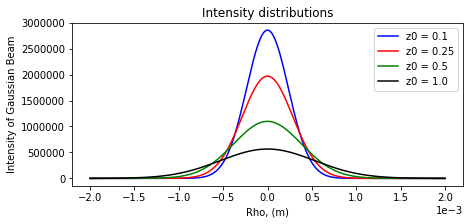

In [19]:
xy_domains = 2.0*10**-3
x = np.linspace(-xy_domains,xy_domains,1000)
y = np.linspace(0,0,1000)
z = 0.1

fig = plt.figure(figsize = (7,3))
ax = fig.add_subplot(111)

intensity0 = ax.plot(x, intensity_GB(x,y,z,z0=0.1), c = 'b', label = 'z0 = 0.1')
intensity1 = ax.plot(x, intensity_GB(x,y,z,z0=0.25), c = 'r', label = 'z0 = 0.25')
intensity2 = ax.plot(x, intensity_GB(x,y,z,z0=0.5), c = 'g', label = 'z0 = 0.5')
intensity3 = ax.plot(x, intensity_GB(x,y,z,z0=1.0), c = 'k', label = 'z0 = 1.0')

ax.legend()
ax.set_title("Intensity distributions")
ax.set_xlabel("Rho, (m)")
ax.set_ylabel("Intensity of Gaussian Beam") 
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.savefig('Intensities_Distribution_beams.png', format = 'png', bbox_inches ='tight')

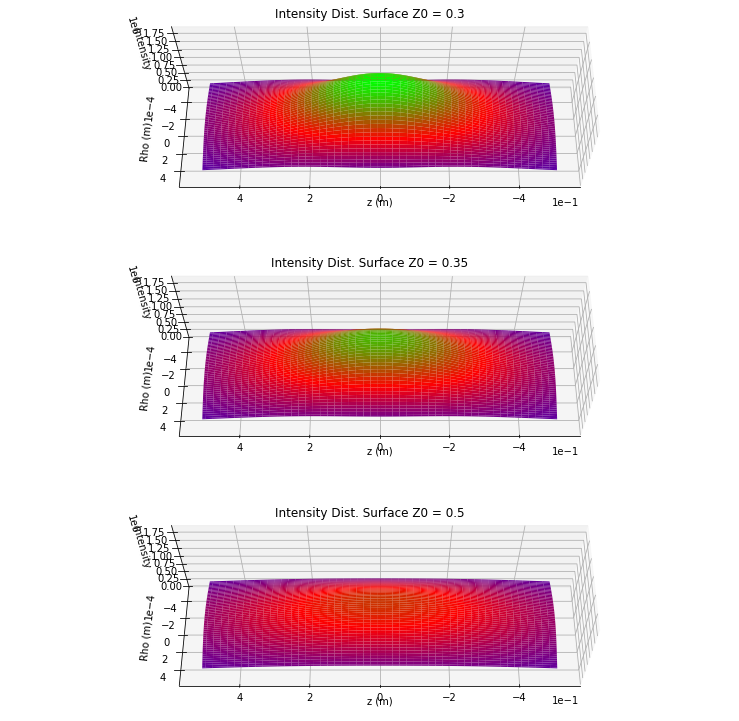

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize = (13, 13), 
                        subplot_kw={'projection': '3d'})
def intensity_GB_1D(x, z, z0, lam = 3500*10**-9):
    w_0 = beam_focus(lam, z0)
    w = beam_waist(z, lam, z0)
    I = 2/(np.pi*w**2) * np.exp(-2*(x/w)**2)
    return I

lam = 3500 *10**-9
xy_domains = 5.0*10**-4
steps = 100
x = np.linspace(-xy_domains,xy_domains, steps)
z = np.linspace(-0.5,0.5,steps)
X,Z = np.meshgrid(x,z)

somelist = [0.3,0.35,0.5]
max_val = intensity_GB_1D(0,0,z0 = min(somelist), lam = lam)
norm = cm.colors.Normalize(vmax = max_val, vmin=0)

i=0
for z0 in somelist:
    intensity = intensity_GB_1D(X, Z, z0 = z0, lam = lam)
    im = axs[i].plot_surface(Z, X, intensity, cmap = 'brg', norm = norm, cstride=2, rstride=2)
    axs[i].set_title("Intensity Dist. Surface Z0 = "+str(z0))
    axs[i].set_ylabel("Rho (m)")
    axs[i].set_xlabel("z (m)")
    axs[i].set_zlabel("Intensity")
    axs[i].set_zlim(0.0,max_val)
    axs[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    axs[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axs[i].ticklabel_format(style='sci', axis='z', scilimits=(0,0))
    axs[i].view_init(60,90 )
    i+=1

fig.savefig('Intensities_Distribution_3ds.png', format = 'png', bbox_inches ='tight')

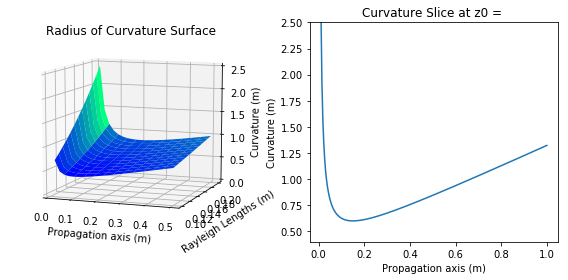

In [13]:
fig = plt.figure(figsize = (8,4),tight_layout = True)

xy_domains = 1.0*10**-4
steps = 25
z0 = np.linspace(0.1, 0.2, steps)
z = np.linspace(0.02,0.5,steps)
Z0,Z = np.meshgrid(z0,z)

R_3d = wavefront_curvature_GB(Z, Z0)

ax0 = fig.add_subplot(121, projection='3d')
ax0.plot_surface(Z, Z0, R_3d, cmap = 'winter', cstride=2, rstride=2)
ax0.set_title("Radius of Curvature Surface")
ax0.set_xlabel("Propagation axis (m)")
ax0.set_ylabel("Rayleigh Lengths (m)")
ax0.set_zlabel("Curvature (m)")
ax0.set_zlim(0,2.5)
ax0.view_init(10,-70)

z0 = 0.15
z = np.linspace(0.01,1.0,steps*10)
R_1d = wavefront_curvature_GB(z, z0=z0)
ax1 = fig.add_subplot(122)
ax1.plot(z, R_1d, label = 'z0 = '+str(z0))
ax1.set_title("Curvature Slice at z0 = ")
ax1.set_xlabel("Propagation axis (m)")
ax1.set_ylabel("Curvature (m)")
ax1.set_ylim(0.4,2.5)

fig.savefig('Radius_of_curvature_3d.png', format = 'png', bbox_inches ='tight')

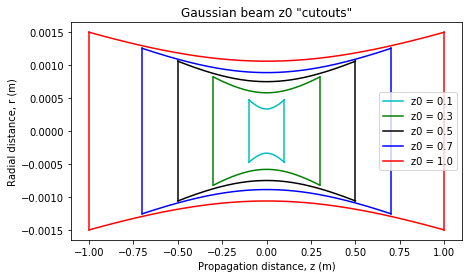

In [14]:
rho = np.linspace(-1,1,1000)
z = np.linspace(-1,1,1000)
steps = 200
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (7, 4))
some_list = [[0.1,'c'],[0.3,'g'],[0.5,'k'],[0.7,'b'],[1.0,'r']]

for z0,color in some_list:
    z = np.linspace(-z0, z0, steps)
    w = beam_waist(z, z0 = z0)
    w_left = w[0]
    z_z0 = np.linspace(z0,z0,steps)
    horizontal_linespace = np.linspace(-w_left, w_left, steps) 
    axs.plot(z, w, c = color, label = 'z0 = '+str(z0))
    axs.plot(z, -w, c = color)
    axs.plot(z_z0,horizontal_linespace, c = color)
    axs.plot(-z_z0,horizontal_linespace, c = color)

    
axs.legend()
axs.set_title("Gaussian beam z0 \"cutouts\"")
axs.set_xlabel("Propagation distance, z (m)")
axs.set_ylabel("Radial distance, r (m)") 
fig.savefig('Gaussian_beams_waists_at_z0.png', format = 'png', bbox_inches ='tight')

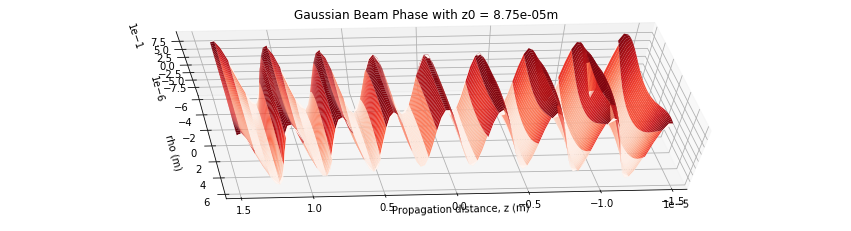

In [89]:
lam = 3500.*10**-9
z0 = lam*3
steps = 100
z_domain = 4*lam
z = np.linspace(-z_domain, z_domain, steps)
xy_domain = beam_waist(z[0],lam = lam, z0=z0)
x = np.linspace(-xy_domain,xy_domain, steps)

Z,X = np.meshgrid(z,x)
Y = np.zeros_like(X)
shape=Z.shape
X_boundary = np.ones_like(X)

for i in range(shape[0]):
    for j in range(shape[1]):
        beam_radius = np.absolute(beam_waist(Z[i,j], lam = 3500.*10**-9 ,z0 = z0))
        abs_x = np.absolute(X[i,j])
        if np.absolute(X[i,j]) > beam_radius:
            X_boundary[i,j] = np.nan

fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (15, 4), subplot_kw={'projection': '3d'})
phase_real, phase_imaginary = phase_GB(X,Y,Z,z0)
phase_real_bound = X_boundary * phase_real

axs.plot_surface(Z, X, phase_real_bound, vmin = -1, vmax = 1,cmap = 'Reds')
axs.set_title("Gaussian Beam Phase with z0 = 8.75e-05m")
axs.set_xlabel("Propagation distance, z (m)")
axs.set_ylabel("rho (m)")
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axs.ticklabel_format(style='sci', axis='z', scilimits=(0,0))
axs.view_init(60,85)
fig.savefig('Gaussian_beam_phases2.png', format = 'png', bbox_inches ='tight')

In [90]:
for i in X_boundary:
    print(i)

[ 1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan  1.]
[ 1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan  1.  1.]
[ 1.  1.  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan

In [91]:
for i in phase_real_bound:
    print(i)

[0.91869287        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

[ 0.96116419  0.71517047  0.29803901 -0.19034349 -0.63313245 -0.92446132
 -0.99471953 -0.82715119 -0.46183073  0.01391884  0.48637386  0.84255662
  0.99721735  0.91322623  0.6105111   0.16139121 -0.32661309 -0.73643477
 -0.9694896  -0.96939864 -0.73571021 -0.3242743   0.16591663  0.61637306
  0.9176504   0.99595853  0.83138783  0.46322975         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
  0.46322975  0.83138783  0.99595853  0.9176504   0.61637306  0.16591663
 -0.3242743  -0.73571021 -0.96939864 -0.9694896  -0

[ 0.66577086  0.22903748 -0.26298234 -0.69114367 -0.95202314 -0.9828552
 -0.77654265 -0.38317266  0.10225258  0.56283822  0.88797257  0.99985658
  0.87203079  0.5355084   0.07112423 -0.40998302 -0.79301716 -0.98689812
 -0.94583848 -0.68003078 -0.25298257  0.23377562  0.66489828  0.93855995
  0.99043913  0.8087185   0.43663363 -0.03794013 -0.50332458 -0.85033947
 -0.99787024 -0.91172924 -0.61245159 -0.17028185  0.31139776  0.72026957
  0.96124366  0.97849904  0.76831628  0.37977913 -0.09675649 -0.55070304
 -0.87688983 -0.99988096 -0.89135741 -0.57657851 -0.12846451  0.34930568
  0.74626607  0.97067242  0.97067242  0.74626607  0.34930568 -0.12846451
 -0.57657851 -0.89135741 -0.99988096 -0.87688983 -0.55070304 -0.09675649
  0.37977913  0.76831628  0.97849904  0.96124366  0.72026957  0.31139776
 -0.17028185 -0.61245159 -0.91172924 -0.99787024 -0.85033947 -0.50332458
 -0.03794013  0.43663363  0.8087185   0.99043913  0.93855995  0.66489828
  0.23377562 -0.25298257 -0.68003078 -0.94583848 -0.

[ 0.60877882  0.15603276 -0.33435295 -0.74347143 -0.97239913 -0.9660598
 -0.72637174 -0.3115639   0.17809026  0.62459614  0.92069575  0.99558756
  0.83174883  0.46888775 -0.00582813 -0.47882716 -0.83735701 -0.99633507
 -0.91843549 -0.62269375 -0.17968435  0.30546883  0.71812306  0.96120565
  0.97795879  0.76503193  0.37294105 -0.10608927 -0.55993372 -0.88283895
 -0.99999837 -0.88473601 -0.56438988 -0.11364843  0.36299448  0.75551427
  0.97371182  0.96782233  0.73970285  0.3421284  -0.13353663 -0.57838558
 -0.89088022 -0.9999421  -0.88100397 -0.56143346 -0.11416368  0.35897138
  0.75039148  0.97116944  0.97116944  0.75039148  0.35897138 -0.11416368
 -0.56143346 -0.88100397 -0.9999421  -0.89088022 -0.57838558 -0.13353663
  0.3421284   0.73970285  0.96782233  0.97371182  0.75551427  0.36299448
 -0.11364843 -0.56438988 -0.88473601 -0.99999837 -0.88283895 -0.55993372
 -0.10608927  0.37294105  0.76503193  0.97795879  0.96120565  0.71812306
  0.30546883 -0.17968435 -0.62269375 -0.91843549 -0.

[ 0.65596964  0.21623498 -0.27569554 -0.70067039 -0.95601699 -0.98029957
 -0.76800791 -0.37068647  0.11569203  0.57398842  0.89413497  0.99953394
  0.86529213  0.52397185  0.05756206 -0.42231978 -0.80118832 -0.98898399
 -0.94139597 -0.67018588 -0.24013953  0.24653296  0.67456202  0.94292238
  0.98860767  0.80129822  0.42553905 -0.04998841 -0.51348523 -0.85634173
 -0.99853827 -0.90721386 -0.60412268 -0.16032296  0.3205755   0.72663488
  0.9636161   0.97676886  0.76337134  0.37317813 -0.10325819 -0.5556341
 -0.87941615 -0.99994159 -0.88956254 -0.57391992 -0.12594268  0.35101413
  0.74699619  0.97076043  0.97076043  0.74699619  0.35101413 -0.12594268
 -0.57391992 -0.88956254 -0.99994159 -0.87941615 -0.5556341  -0.10325819
  0.37317813  0.76337134  0.97676886  0.9636161   0.72663488  0.3205755
 -0.16032296 -0.60412268 -0.90721386 -0.99853827 -0.85634173 -0.51348523
 -0.04998841  0.42553905  0.80129822  0.98860767  0.94292238  0.67456202
  0.24653296 -0.24013953 -0.67018588 -0.94139597 -0.9

[ 0.75155672  0.34632987 -0.14241543 -0.5965946  -0.90669945 -0.99816891
 -0.84924473 -0.49605369 -0.02375349  0.45406589  0.82272613  0.99396153
  0.92698784  0.63812652  0.19673667 -0.29150989 -0.70996035 -0.95883983
 -0.97898924 -0.76584972 -0.37040956  0.11305767  0.56949977  0.89045867
  0.99980241  0.8717253   0.53677898  0.07454162 -0.40530573 -0.78899494
 -0.98561549 -0.9486199  -0.68681593 -0.26225893  0.22444982  0.65798174
  0.9355878   0.9914388   0.81223979  0.44041418 -0.03591207 -0.50377269
 -0.85214123 -0.99828532 -0.90743716 -0.60109456 -0.15195929  0.33330486
  0.73940843  0.96984468  0.96984468  0.73940843  0.33330486 -0.15195929
 -0.60109456 -0.90743716 -0.99828532 -0.85214123 -0.50377269 -0.03591207
  0.44041418  0.81223979  0.9914388   0.9355878   0.65798174  0.22444982
 -0.26225893 -0.68681593 -0.9486199  -0.98561549 -0.78899494 -0.40530573
  0.07454162  0.53677898  0.8717253   0.99980241  0.89045867  0.56949977
  0.11305767 -0.37040956 -0.76584972 -0.97898924 -0

[ 0.99693876  0.8411049   0.48481831  0.01301041 -0.46189449 -0.82673979
 -0.99456451 -0.92530756 -0.63537385 -0.19378463  0.29419035  0.71205585
  0.95984789  0.97803837  0.76188929  0.36279612 -0.12377269         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan   